# Projeto ADEL (Análise Dados Estadia em Limeira) - Análise das acomodações coletadas
Neste notebook, realizarei a limpeza dos dados e determinarei o ranking das melhores acomodações do dataset gerado anteriormente.

## Carregando os dados

In [99]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
file = files.upload()

Saving acomodacoes_hashcode.csv to acomodacoes_hashcode.csv


In [118]:
df = pd.read_csv('acomodacoes_hashcode.csv')
print(df.shape)
df.head()

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
0,c7234506476bbf0aff48eda764ff9eba,475b51cf4a3bf4f29cb2414680851193,57544d6162644c4cec89720f0d0fb27b,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...
1,c7234506476bbf0aff48eda764ff9eba,f2ba6e963c17f9aff690f767c73a7f87,00f33a85f39b78148f5941eac174acd2,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...
2,c7234506476bbf0aff48eda764ff9eba,047b2a430e6e4409268af5251b53d3e1,b62fad32adf34709c628e9833d66b8df,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...
3,c7234506476bbf0aff48eda764ff9eba,e3b2a519bc4e229ab0444cb144c3c407,2d7097bf091516c6952950802bd49019,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...
4,c7234506476bbf0aff48eda764ff9eba,71edf6c4e8ad2dee47bf8c9b275c022a,12d0456fa8a537ce311abb5ea43c4b03,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35 M2,1,1,0,Kitnet próxima à Unicamp (FCA) contendo quarto...


Realizar tratamentos nas colunas:
* Aluguel
* Condomínio
* Área
* Vaga garagem

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   imob          80 non-null     object
 1   imovel_url    80 non-null     object
 2   codigo        80 non-null     object
 3   nome          80 non-null     object
 4   bairro        80 non-null     object
 5   aluguel       80 non-null     object
 6   condominio    80 non-null     object
 7   area          78 non-null     object
 8   quartos       80 non-null     int64 
 9   banheiros     80 non-null     int64 
 10  vaga_garagem  37 non-null     object
 11  descricao     80 non-null     object
dtypes: int64(2), object(10)
memory usage: 7.6+ KB


Conferindo as 3 imobiliárias

In [120]:
df['imob'].unique()

array(['c7234506476bbf0aff48eda764ff9eba',
       'ef23a7e1738f4b316011bbdd88e514a2',
       '53dd1202c5ef8ce3878ffbd4b3c79bd2'], dtype=object)

## Limpeza dos dados

In [121]:
df.isnull().sum()

imob             0
imovel_url       0
codigo           0
nome             0
bairro           0
aluguel          0
condominio       0
area             2
quartos          0
banheiros        0
vaga_garagem    43
descricao        0
dtype: int64

### Coluna: vaga de garagem

In [122]:
df['vaga_garagem'].unique()

array(['0', '1', nan, 'Não', 'Sim'], dtype=object)

In [123]:
# Mapeando para inteiro
map_vaga_garagem = {
    'Não': 0,
    'Sim': 1
}

df['vaga_garagem'] = df['vaga_garagem'].map(map_vaga_garagem)
df['vaga_garagem'].unique()

array([nan,  0.,  1.])

In [125]:
print(df['vaga_garagem'].dtype)
print(df['vaga_garagem'].unique())

float64
[nan  0.  1.]


In [126]:
df['vaga_garagem']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
75    NaN
76    1.0
77    NaN
78    0.0
79    0.0
Name: vaga_garagem, Length: 80, dtype: float64

### Coluna: área

In [127]:
df['area'].unique()

array(['35      M2', '1       QUARTO CONJUGADO',
       '1       QUARTO COM ARMARIO',
       '1       QUARTO CONJUGADO COM A SALA',
       '1       QUARTO CONJUGADO COM COZINHA', nan, '16      M2',
       '1º      ANDAR', '25      M2', '0 m2', '50 m2', '250 m2', '20',
       '30', '0'], dtype=object)

In [12]:
# Preenchendo nulos com 0
df['area'] = df['area'].fillna('0')

In [128]:
# Coletando apenas o número e convertendo para int
areas = []
for i in range(len(df['area'])):
  try:
    area_value = int(re.findall('\d[0-9]+', df['area'][i])[0])
  except:
    area_value = np.nan
  areas.append(area_value)
areas

[35,
 35,
 35,
 35,
 35,
 nan,
 nan,
 35,
 nan,
 35,
 35,
 nan,
 35,
 35,
 nan,
 35,
 35,
 35,
 35,
 nan,
 16,
 16,
 nan,
 16,
 16,
 25,
 25,
 16,
 nan,
 50,
 50,
 nan,
 50,
 nan,
 nan,
 50,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 250,
 nan,
 nan,
 50,
 50,
 nan,
 nan,
 nan,
 nan,
 nan,
 20,
 20,
 20,
 20,
 30,
 30,
 nan,
 nan,
 nan]

In [129]:
# Fazendo o tratamento
df['area'] = areas
print(df['area'].dtype)
print(df['area'].unique())

float64
[ 35.  nan  16.  25.  50. 250.  20.  30.]


In [130]:
print(df.shape)
df.head()

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
0,c7234506476bbf0aff48eda764ff9eba,475b51cf4a3bf4f29cb2414680851193,57544d6162644c4cec89720f0d0fb27b,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
1,c7234506476bbf0aff48eda764ff9eba,f2ba6e963c17f9aff690f767c73a7f87,00f33a85f39b78148f5941eac174acd2,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
2,c7234506476bbf0aff48eda764ff9eba,047b2a430e6e4409268af5251b53d3e1,b62fad32adf34709c628e9833d66b8df,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
3,c7234506476bbf0aff48eda764ff9eba,e3b2a519bc4e229ab0444cb144c3c407,2d7097bf091516c6952950802bd49019,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
4,c7234506476bbf0aff48eda764ff9eba,71edf6c4e8ad2dee47bf8c9b275c022a,12d0456fa8a537ce311abb5ea43c4b03,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,"R$1.000,00","\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imob          80 non-null     object 
 1   imovel_url    80 non-null     object 
 2   codigo        80 non-null     object 
 3   nome          80 non-null     object 
 4   bairro        80 non-null     object 
 5   aluguel       80 non-null     object 
 6   condominio    80 non-null     object 
 7   area          34 non-null     float64
 8   quartos       80 non-null     int64  
 9   banheiros     80 non-null     int64  
 10  vaga_garagem  5 non-null      float64
 11  descricao     80 non-null     object 
dtypes: float64(2), int64(2), object(8)
memory usage: 7.6+ KB


### Coluna: aluguel

In [132]:
df['aluguel'].unique()

array(['R$1.000,00', 'R$850,00', 'R$750,00', 'R$950,00', 'R$ 1.000,00',
       'R$ 900,00', 'R$ 850,00', 'R$ 800,00', 'R$ 780,00', 'R$ 700,00',
       'R$ 500,00', 'Sob consulta', 'Locação:  R$ 780,00',
       'Locação:  R$ 800,00', 'Locação:  R$ 850,00',
       'Locação:  R$ 950,00', 'Locação:  R$ 1.000,00'], dtype=object)

In [133]:
# Extraindo numeros com ',' e convertendo para float
values_extracted = []
for i in range(len(df['aluguel'])):
  try:
    value_extracted = re.findall('[0-9]+[,]*', df['aluguel'][i])
    value_extracted = float(''.join(value_extracted).replace(',', '.'))
  except:
    value_extracted = np.nan
  values_extracted.append(value_extracted)
values_extracted

[1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 850.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 750.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 900.0,
 900.0,
 900.0,
 900.0,
 900.0,
 900.0,
 850.0,
 850.0,
 850.0,
 850.0,
 800.0,
 800.0,
 800.0,
 780.0,
 780.0,
 700.0,
 700.0,
 700.0,
 500.0,
 nan,
 780.0,
 800.0,
 800.0,
 800.0,
 850.0,
 850.0,
 950.0,
 1000.0,
 1000.0]

In [134]:
# Fazendo tratamento
df['aluguel'] = values_extracted
print(df['aluguel'].dtype)
print(df['aluguel'].unique())

float64
[1000.  850.  750.  950.  900.  800.  780.  700.  500.   nan]


In [135]:
print(df.shape)
df.head()

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
0,c7234506476bbf0aff48eda764ff9eba,475b51cf4a3bf4f29cb2414680851193,57544d6162644c4cec89720f0d0fb27b,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
1,c7234506476bbf0aff48eda764ff9eba,f2ba6e963c17f9aff690f767c73a7f87,00f33a85f39b78148f5941eac174acd2,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
2,c7234506476bbf0aff48eda764ff9eba,047b2a430e6e4409268af5251b53d3e1,b62fad32adf34709c628e9833d66b8df,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
3,c7234506476bbf0aff48eda764ff9eba,e3b2a519bc4e229ab0444cb144c3c407,2d7097bf091516c6952950802bd49019,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
4,c7234506476bbf0aff48eda764ff9eba,71edf6c4e8ad2dee47bf8c9b275c022a,12d0456fa8a537ce311abb5ea43c4b03,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,"\n\n + Condomínio R$0,00 i\...",35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...


### Coluna: condomínio

In [136]:
df['condominio'].unique()

array(['\n\n                    + Condomínio R$0,00 i\nValores sujeitos a alteração.\n\n+ IPTU R$0,00\n',
       '\n\n                    + Condomínio R$100,00 i\nValores sujeitos a alteração.\n\n+ IPTU R$0,00\n',
       '0.0', '80.0'], dtype=object)

In [137]:
# Extraindo somente os numeros e convertendo para float
values_extracted = []
for i in range(len(df['condominio'])):
  try:
    value_extracted = re.findall('[0-9]+[,.][0-9]+', df['condominio'][i])
    value_extracted = [float(x.replace(',', '.')) for x in value_extracted]
    value_extracted = sum(value_extracted)
  except:
    value_extracted = np.nan
  values_extracted.append(value_extracted)
values_extracted

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 100.0,
 100.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 80.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [138]:
# Fazendo tratamento
df['condominio'] = values_extracted
print(df['condominio'].dtype)
print(df['condominio'].unique())

float64
[  0. 100.  80.]


In [139]:
print(df.shape)
df.sample(5)

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
53,ef23a7e1738f4b316011bbdd88e514a2,f9e143fd88cff8563a467df71cc70b44,d81e604fe471f170cc3cc19ee73c20dc,fc5f4e72ac82ea901f0f4f77ab0e9281,Jardim Paulista - Limeira/Sp,900.0,0.0,NaN,1,1,NaN,Imóvel totalmente reformado para atender espec...
7,c7234506476bbf0aff48eda764ff9eba,3c4f789084c796e08666b8db67e710b3,0236a38d5e4d324ecebfb8c807b7f238,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
48,ef23a7e1738f4b316011bbdd88e514a2,426efdfedb177f22cf060a2db44dd31a,941707c7ec03960821a488b2754bd59a,0ef98b2b924d268967e63d0747a4bd65,Jardim Cidade Universitária I - Limeira/Sp,1000.0,0.0,NaN,1,1,NaN,Imóvel muito bem localizado Conta com sala e ...
18,c7234506476bbf0aff48eda764ff9eba,a1821f50b18cd950131c1906d6fc2750,02ae405e9d8013cc5d033c272e2a800d,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
37,ef23a7e1738f4b316011bbdd88e514a2,1ea21866cc1dce17743884bf5f572aec,8fb0a0798b0f5b56b77aaf7df6294525,0ef98b2b924d268967e63d0747a4bd65,Jardim Cidade Universitária I - Limeira/Sp,1000.0,0.0,NaN,1,1,NaN,Imóvel próximo à Unicamp e também com entrada ...


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imob          80 non-null     object 
 1   imovel_url    80 non-null     object 
 2   codigo        80 non-null     object 
 3   nome          80 non-null     object 
 4   bairro        80 non-null     object 
 5   aluguel       79 non-null     float64
 6   condominio    80 non-null     float64
 7   area          34 non-null     float64
 8   quartos       80 non-null     int64  
 9   banheiros     80 non-null     int64  
 10  vaga_garagem  5 non-null      float64
 11  descricao     80 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 7.6+ KB


### Coluna: bairro

Remover cidade e estado do bairro

In [141]:
df['bairro'].unique()

array([' CIDADE UNIVERSITARIA', ' JD. PAULISTA',
       'Jardim Paulista - Limeira/Sp',
       'Jardim Cidade Universitária I - Limeira/Sp',
       'Jardim Cidade Universitária I - Limeira/Sp ',
       'Jardim São Paulo - Limeira/Sp ',
       'Jardim Morro Azul - Limeira/Sp ',
       'Jardim Cidade Universitaria I - Limeira/SP',
       'Chacara Antonieta - Limeira/SP'], dtype=object)

In [142]:
texts_extracted = [x.split('-')[0].strip() for x in df['bairro']]
df['bairro'] = texts_extracted
df['bairro'].unique()

array(['CIDADE UNIVERSITARIA', 'JD. PAULISTA', 'Jardim Paulista',
       'Jardim Cidade Universitária I', 'Jardim São Paulo',
       'Jardim Morro Azul', 'Jardim Cidade Universitaria I',
       'Chacara Antonieta'], dtype=object)

In [143]:
print(df.shape)
df.sample(5)

(80, 12)


,imob,imovel_url,codigo,nome,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
20,c7234506476bbf0aff48eda764ff9eba,8281ee9fcc5eba6b80e3975d7692515a,b3b477f0632310b03bde750706df4596,245d9e8bab947ecf1ee8867fe9597ab2,JD. PAULISTA,950.0,0.0,16.0,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...
17,c7234506476bbf0aff48eda764ff9eba,fdc3e007e30b39592c7e0b25c154a6be,d41f3ff29acc315dd5302d634301606b,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próximo à Unicamp (FCA) sendo quarto e ...
69,ef23a7e1738f4b316011bbdd88e514a2,fe8b785ca524fe5068969271479bcb44,39a6db2728600ac4a1ef144ab6635476,3e72ebb916cf78b0770a12cbc2c1fafa,Jardim Morro Azul,500.0,0.0,NaN,1,1,NaN,"Kitnet com 1 dormitório, 1 cozinha e 1 banheir..."
15,c7234506476bbf0aff48eda764ff9eba,ff827e86e926255a970c108652fd6e7d,7500856834d96bce86e5e6343d8ef15f,245d9e8bab947ecf1ee8867fe9597ab2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
36,ef23a7e1738f4b316011bbdd88e514a2,0ba85ac82e015afbcfa90463af2a8aec,e3ac2c5e0d51230d756de5db78c7452d,0ef98b2b924d268967e63d0747a4bd65,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel em frente à portaria principal da Unica...


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imob          80 non-null     object 
 1   imovel_url    80 non-null     object 
 2   codigo        80 non-null     object 
 3   nome          80 non-null     object 
 4   bairro        80 non-null     object 
 5   aluguel       79 non-null     float64
 6   condominio    80 non-null     float64
 7   area          34 non-null     float64
 8   quartos       80 non-null     int64  
 9   banheiros     80 non-null     int64  
 10  vaga_garagem  5 non-null      float64
 11  descricao     80 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 7.6+ KB


### Removendo colunas desnecessarias

In [145]:
df = df.drop(columns=['imovel_url', 'nome'])
print(df.shape)
df.sample(10)

(80, 10)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
76,53dd1202c5ef8ce3878ffbd4b3c79bd2,a92a6e35acca298c33b9d2c83bde3505,Chacara Antonieta,850.0,0.0,30.0,1,1,1.0,"CAMA, GUARDA-ROUPA, GELADEIRA, BANCADA, TANQU..."
21,c7234506476bbf0aff48eda764ff9eba,d7605883477939a58e52e551391d5dcb,JD. PAULISTA,950.0,0.0,16.0,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...
36,ef23a7e1738f4b316011bbdd88e514a2,e3ac2c5e0d51230d756de5db78c7452d,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel em frente à portaria principal da Unica...
23,c7234506476bbf0aff48eda764ff9eba,6a079dd44e0e8cc401934fe33492d0bc,JD. PAULISTA,950.0,0.0,16.0,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...
25,c7234506476bbf0aff48eda764ff9eba,48cf0deecd859f082300f8bb8f2ee7c6,CIDADE UNIVERSITARIA,950.0,100.0,25.0,1,1,NaN,Apartamento localizado no Chacara Antonieta co...
26,c7234506476bbf0aff48eda764ff9eba,ded7b202961dd5bb3fd74353a755c6de,CIDADE UNIVERSITARIA,950.0,100.0,25.0,1,1,NaN,Apartamento localizado no Chacara Antonieta co...
74,53dd1202c5ef8ce3878ffbd4b3c79bd2,350e21033122ce335fd0fd5f0031179d,Jardim Cidade Universitaria I,800.0,0.0,20.0,1,1,1.0,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ..."
31,ef23a7e1738f4b316011bbdd88e514a2,2c8c9e9121145fbc37ef67c0a5ea3869,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel muito bem localizado. Conta com sala e...
34,ef23a7e1738f4b316011bbdd88e514a2,7ef0dfe78be61f5fd8392d3948fb860c,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,"Imóvel com: geladeira, fogão, gabinete e mesa ..."
11,c7234506476bbf0aff48eda764ff9eba,17e432c6fd9c0be3a2cbf043f3bd8387,CIDADE UNIVERSITARIA,750.0,0.0,NaN,1,1,NaN,Kitinet localizada na Cidade Universitária pró...


## Análise exploratória

In [231]:
df_acomodacoes = df.copy()
print(df_acomodacoes.shape)
df_acomodacoes.head()

(80, 10)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
0,c7234506476bbf0aff48eda764ff9eba,57544d6162644c4cec89720f0d0fb27b,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
1,c7234506476bbf0aff48eda764ff9eba,00f33a85f39b78148f5941eac174acd2,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
2,c7234506476bbf0aff48eda764ff9eba,b62fad32adf34709c628e9833d66b8df,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
3,c7234506476bbf0aff48eda764ff9eba,2d7097bf091516c6952950802bd49019,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
4,c7234506476bbf0aff48eda764ff9eba,12d0456fa8a537ce311abb5ea43c4b03,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...


### Tratamento

In [232]:
df_acomodacoes['imob'].unique()

array(['c7234506476bbf0aff48eda764ff9eba',
       'ef23a7e1738f4b316011bbdd88e514a2',
       '53dd1202c5ef8ce3878ffbd4b3c79bd2'], dtype=object)

In [233]:
imob_map = {
    '53dd1202c5ef8ce3878ffbd4b3c79bd2': 'A',
    'ef23a7e1738f4b316011bbdd88e514a2': 'B',
    'c7234506476bbf0aff48eda764ff9eba': 'C'
}

df_acomodacoes['imob'] = df_acomodacoes['imob'].map(imob_map)
df_acomodacoes.sample(5)

,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao
37,B,8fb0a0798b0f5b56b77aaf7df6294525,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel próximo à Unicamp e também com entrada ...
13,C,a264ee68837c839ccf3a90ee71c91b41,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...
36,B,e3ac2c5e0d51230d756de5db78c7452d,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel em frente à portaria principal da Unica...
58,B,97bcff626e416e4682240b08bfe240e9,Jardim Cidade Universitária I,850.0,0.0,NaN,1,1,NaN,"Kitnet no bairro Universitário, próximo a Unic..."
62,B,decee23146cd497fccdaa119dd7f51b8,Jardim Cidade Universitária I,800.0,0.0,NaN,1,1,NaN,Ótimo apartamento na Cidade Universitária com ...


In [234]:
df_acomodacoes['total'] = df_acomodacoes['aluguel'] + df_acomodacoes['condominio']
print(df_acomodacoes.shape)
df_acomodacoes.sample(5)

(80, 11)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total
10,C,8621c612207ad3dbf1da43a0c56d6116,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0
27,C,b2d83e2253d0695b33e339b8fdd48a94,JD. PAULISTA,950.0,0.0,16.0,1,1,NaN,Kitinet medindo 16 m² próximo à Faculdade Unic...,950.0
35,B,5416c9b0aba5eb43b419b107d3975a76,Jardim Cidade Universitária I,1000.0,0.0,50.0,1,1,NaN,Imóvel muito bem localizado Conta com sala e ...,1000.0
63,B,c18e0e8dc2d9c9e19e50d86b8903cfa7,Jardim Cidade Universitária I,800.0,0.0,NaN,1,1,NaN,Ótimo apartamento na Cidade Universitária com ...,800.0
44,B,f35ab38d7e2c5a4b5e0a009ccc32d452,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel novo 1 locação próximo à Unicamp e tamb...,1000.0


In [235]:
df_acomodacoes['preco_m2'] = df_acomodacoes['total'] / df_acomodacoes['area']
df_acomodacoes['preco_m2'] = df_acomodacoes['preco_m2'].replace(np.inf, np.nan)

print(df_acomodacoes.shape)
df_acomodacoes.sample(5)

(80, 12)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2
79,A,4cc0e019beccf19b1e1182b9e896f089,Jardim Cidade Universitaria I,1000.0,0.0,NaN,1,1,0.0,1 QUARTO COM ARMÁRIO E AR CONDICIONADO;1 SALA ...,1000.0,NaN
20,C,b3b477f0632310b03bde750706df4596,JD. PAULISTA,950.0,0.0,16.0,1,1,NaN,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,59.375000
69,B,39a6db2728600ac4a1ef144ab6635476,Jardim Morro Azul,500.0,0.0,NaN,1,1,NaN,"Kitnet com 1 dormitório, 1 cozinha e 1 banheir...",500.0,NaN
10,C,8621c612207ad3dbf1da43a0c56d6116,CIDADE UNIVERSITARIA,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429
50,B,8a4aa098922c72013ace92f92de73cc9,Jardim Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,"Imóvel novo, 1º locação, em frente à portaria ...",1000.0,NaN


In [236]:
df_acomodacoes.describe()

,aluguel,condominio,area,quartos,banheiros,vaga_garagem,total,preco_m2
count,79.000000,80.000000,34.000000,80.0,80.0,5.000000,79.000000,34.000000
mean,928.987342,3.500000,38.529412,1.0,1.0,0.400000,932.531646,32.792402
std,101.862085,17.938009,38.966369,0.0,0.0,0.547723,102.687831,13.905988
min,500.000000,0.000000,16.000000,1.0,1.0,0.000000,500.000000,3.200000
25%,850.000000,0.000000,21.250000,1.0,1.0,0.000000,865.000000,28.392857
50%,1000.000000,0.000000,35.000000,1.0,1.0,0.000000,1000.000000,28.571429
75%,1000.000000,0.000000,35.000000,1.0,1.0,1.000000,1000.000000,40.000000
max,1000.000000,100.000000,250.000000,1.0,1.0,1.000000,1050.000000,59.375000


In [237]:
df_acomodacoes['bairro'].value_counts()

Jardim Cidade Universitária I    32
CIDADE UNIVERSITARIA             22
Jardim Cidade Universitaria I     7
Jardim Paulista                   7
JD. PAULISTA                      6
Jardim Morro Azul                 3
Chacara Antonieta                 2
Jardim São Paulo                  1
Name: bairro, dtype: int64

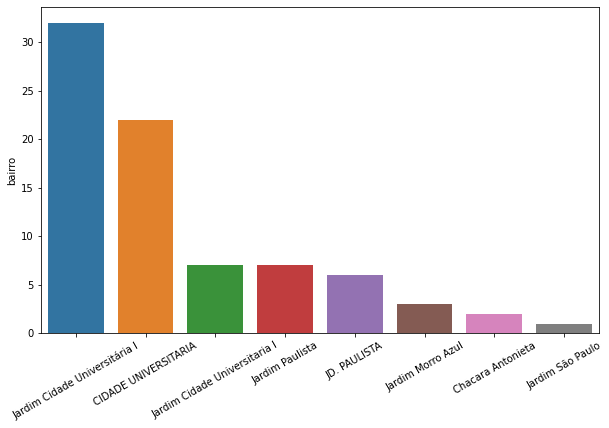

In [238]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_acomodacoes['bairro'].value_counts().index, y=df_acomodacoes['bairro'].value_counts())
plt.xticks(rotation=30)
plt.show()

In [239]:
bairro_map = {
    'Jardim Cidade Universitária I': 'JD. Cidade Universitária I',
    'CIDADE UNIVERSITARIA': 'JD. Cidade Universitária I',
    'Jardim Cidade Universitaria I': 'JD. Cidade Universitária I',
    'Jardim Paulista': 'JD. Paulista',
    'JD. PAULISTA': 'JD. Paulista',
    'Jardim Morro Azul': 'JD. Morro Azul',
    'Chacara Antonieta': 'Chácara Antonieta',
    'Jardim São Paulo': 'JD. São Paulo'
}

df_acomodacoes['bairro'] = df_acomodacoes['bairro'].map(bairro_map)
print(df_acomodacoes.shape)
df_acomodacoes['bairro'].unique()

(80, 12)


array(['JD. Cidade Universitária I', 'JD. Paulista', 'JD. São Paulo',
       'JD. Morro Azul', 'Chácara Antonieta'], dtype=object)

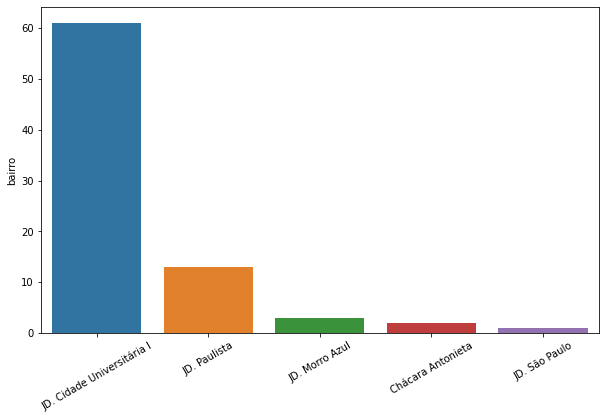

In [240]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_acomodacoes['bairro'].value_counts().index, y=df_acomodacoes['bairro'].value_counts())
plt.xticks(rotation=30)
plt.show()

Importando dados dos bairros eleitos

In [241]:
bairros_eleitos_file = files.upload()

Saving bairros_eleitos.csv to bairros_eleitos (1).csv


In [242]:
df_bairros = pd.read_csv('bairros_eleitos.csv')
df_bairros = df_bairros.drop(columns=['lat', 'lon'])
df_bairros

,bairro,dist
0,jardim aquarius,1.467927
1,parque centreville,1.158567
2,parque sao bento,1.258614
3,vila mathias,1.425913
4,vila sao joao,1.366778
5,jardim nossa sra. de fatima,0.466497
6,jardim santa fe,0.438750
7,cidade universitaria,1.385428
8,jardim perola,1.451089
9,jardim esmeralda,1.196814


In [243]:
df_bairros = df_bairros.iloc[[7, 11, 10, 19],:]
df_bairros = df_bairros.sort_values(by='dist').reset_index(drop=True)
df_bairros.head()

,bairro,dist
0,jardim paulista,0.447600
1,jardim morro azul,0.750764
2,cidade universitaria,1.385428
3,Chácara Antonieta,1.502339


In [244]:
dists_unicamp = []

for bairro in df_acomodacoes['bairro']:
  if bairro == 'JD. Cidade Universitária I':
    dists_unicamp.append(df_bairros.loc[2, 'dist'])
  elif bairro == 'JD. Paulista':
    dists_unicamp.append(df_bairros.loc[0, 'dist'])
  elif bairro == 'JD. Morro Azul':
    dists_unicamp.append(df_bairros.loc[1, 'dist'])
  elif bairro == 'Chácara Antonieta':
    dists_unicamp.append(df_bairros.loc[3, 'dist'])
  elif bairro == 'JD. São Paulo':
    dists_unicamp.append(np.nan)
dists_unicamp

[1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 0.4476004851487637,
 0.4476004851487637,
 0.4476004851487637,
 0.4476004851487637,
 0.4476004851487637,
 1.3854276880650611,
 1.3854276880650611,
 0.4476004851487637,
 0.4476004851487637,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880650611,
 1.3854276880

In [245]:
df_acomodacoes['dist_unicamp'] = dists_unicamp
print(df_acomodacoes.shape)
df_acomodacoes.sample(5)

(80, 13)


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
67,B,af6492af6c80fea75bafc9c5d3464970,JD. Cidade Universitária I,700.0,0.0,NaN,1,1,NaN,Apto com micro-ondas geladeira e fogão elétric...,700.0,NaN,1.385428
3,C,2d7097bf091516c6952950802bd49019,JD. Cidade Universitária I,1000.0,0.0,35.0,1,1,NaN,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429,1.385428
69,B,39a6db2728600ac4a1ef144ab6635476,JD. Morro Azul,500.0,0.0,NaN,1,1,NaN,"Kitnet com 1 dormitório, 1 cozinha e 1 banheir...",500.0,NaN,0.750764
48,B,941707c7ec03960821a488b2754bd59a,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,NaN,Imóvel muito bem localizado Conta com sala e ...,1000.0,NaN,1.385428
60,B,c3ff9f70c3bdd79c59d6a641c3d2eabc,JD. Cidade Universitária I,850.0,0.0,NaN,1,1,NaN,Kitnet localizada na Cidade Universitária próx...,850.0,NaN,1.385428


In [246]:
df_acomodacoes = df_acomodacoes[df_acomodacoes['aluguel'].notna()]
df_acomodacoes['vaga_garagem'] = df_acomodacoes['vaga_garagem'].fillna(0)
df_acomodacoes.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


imob             0
codigo           0
bairro           0
aluguel          0
condominio       0
area            45
quartos          0
banheiros        0
vaga_garagem     0
descricao        0
total            0
preco_m2        45
dist_unicamp     1
dtype: int64

In [247]:
df_acomodacoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 79
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imob          79 non-null     object 
 1   codigo        79 non-null     object 
 2   bairro        79 non-null     object 
 3   aluguel       79 non-null     float64
 4   condominio    79 non-null     float64
 5   area          34 non-null     float64
 6   quartos       79 non-null     int64  
 7   banheiros     79 non-null     int64  
 8   vaga_garagem  79 non-null     float64
 9   descricao     79 non-null     object 
 10  total         79 non-null     float64
 11  preco_m2      34 non-null     float64
 12  dist_unicamp  78 non-null     float64
dtypes: float64(7), int64(2), object(4)
memory usage: 8.6+ KB


In [248]:
df_acomodacoes.sample(5)

,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
79,A,4cc0e019beccf19b1e1182b9e896f089,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,1 QUARTO COM ARMÁRIO E AR CONDICIONADO;1 SALA ...,1000.0,NaN,1.385428
47,B,475644c10a484e1b4248c595e8b15d78,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,Imóvel muito bem localizado! Conta com sala e...,1000.0,NaN,1.385428
73,A,f773fe72ae9c3ae06183ea91d181347a,JD. Cidade Universitária I,800.0,80.0,20.0,1,1,0.0,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ...",880.0,44.0,1.385428
28,B,8ea6bceec892ab9d2467eb912385a1a9,JD. Paulista,1000.0,0.0,NaN,1,1,0.0,"Kitnet com um dormitório, banheiro, cozinha, á...",1000.0,NaN,0.447600
65,B,907f7fdcc12a82eadaec78ffa35e4708,JD. São Paulo,780.0,0.0,50.0,1,1,0.0,"Kitnet com 01 dormitório, 01 banheiro.",780.0,15.6,NaN


In [594]:
df_acomodacoes.to_csv('acomodacoes_hashcode_clean.csv', index=False)
files.download('acomodacoes_hashcode_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Análise

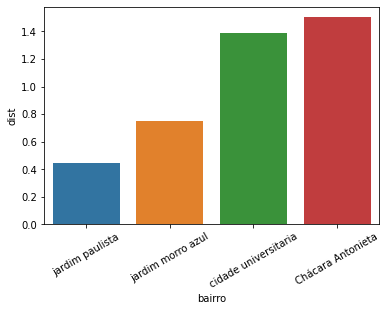

In [249]:
sns.barplot(x='bairro', y='dist', data=df_bairros)
plt.xticks(rotation=30)
plt.show()

#### Distribuições

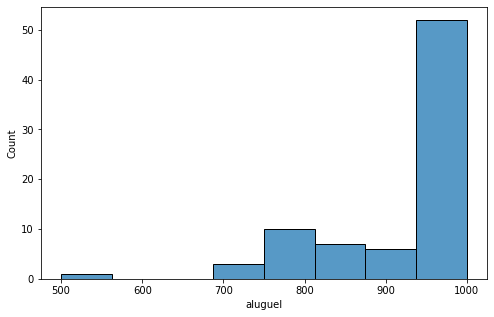

In [251]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_acomodacoes, x="aluguel")
plt.show()

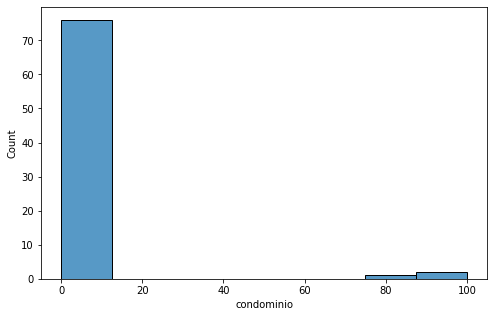

In [252]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_acomodacoes, x="condominio")
plt.show()

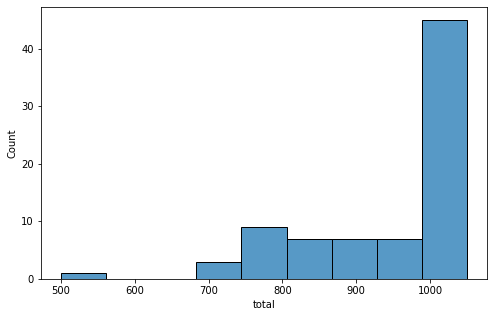

In [253]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_acomodacoes, x="total")
plt.show()

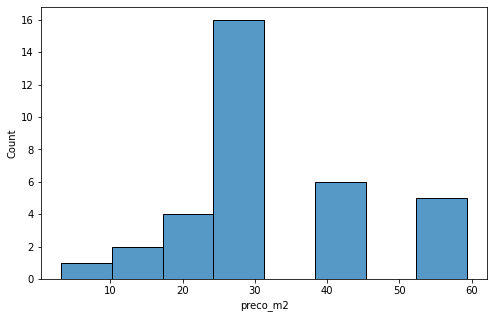

In [255]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_acomodacoes, x="preco_m2")
plt.show()

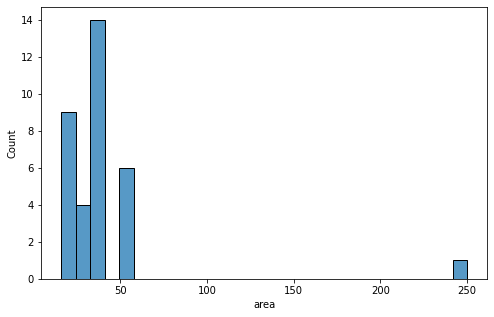

In [254]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_acomodacoes, x="area")
plt.show()

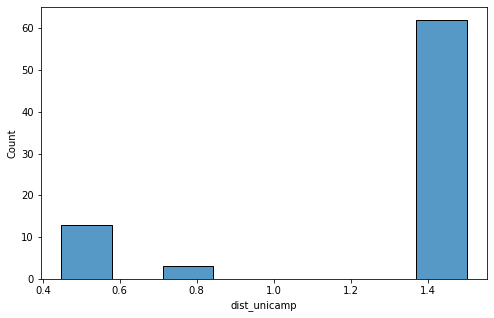

In [256]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_acomodacoes, x="dist_unicamp")
plt.show()

#### Correlação

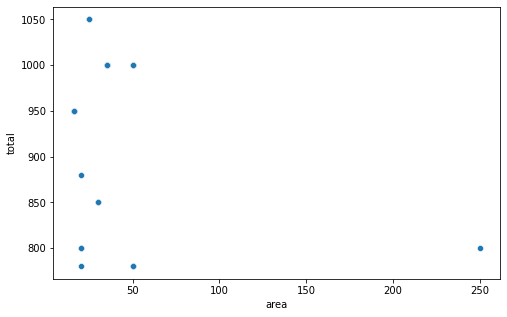

In [259]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='total', data=df_acomodacoes)
plt.show()

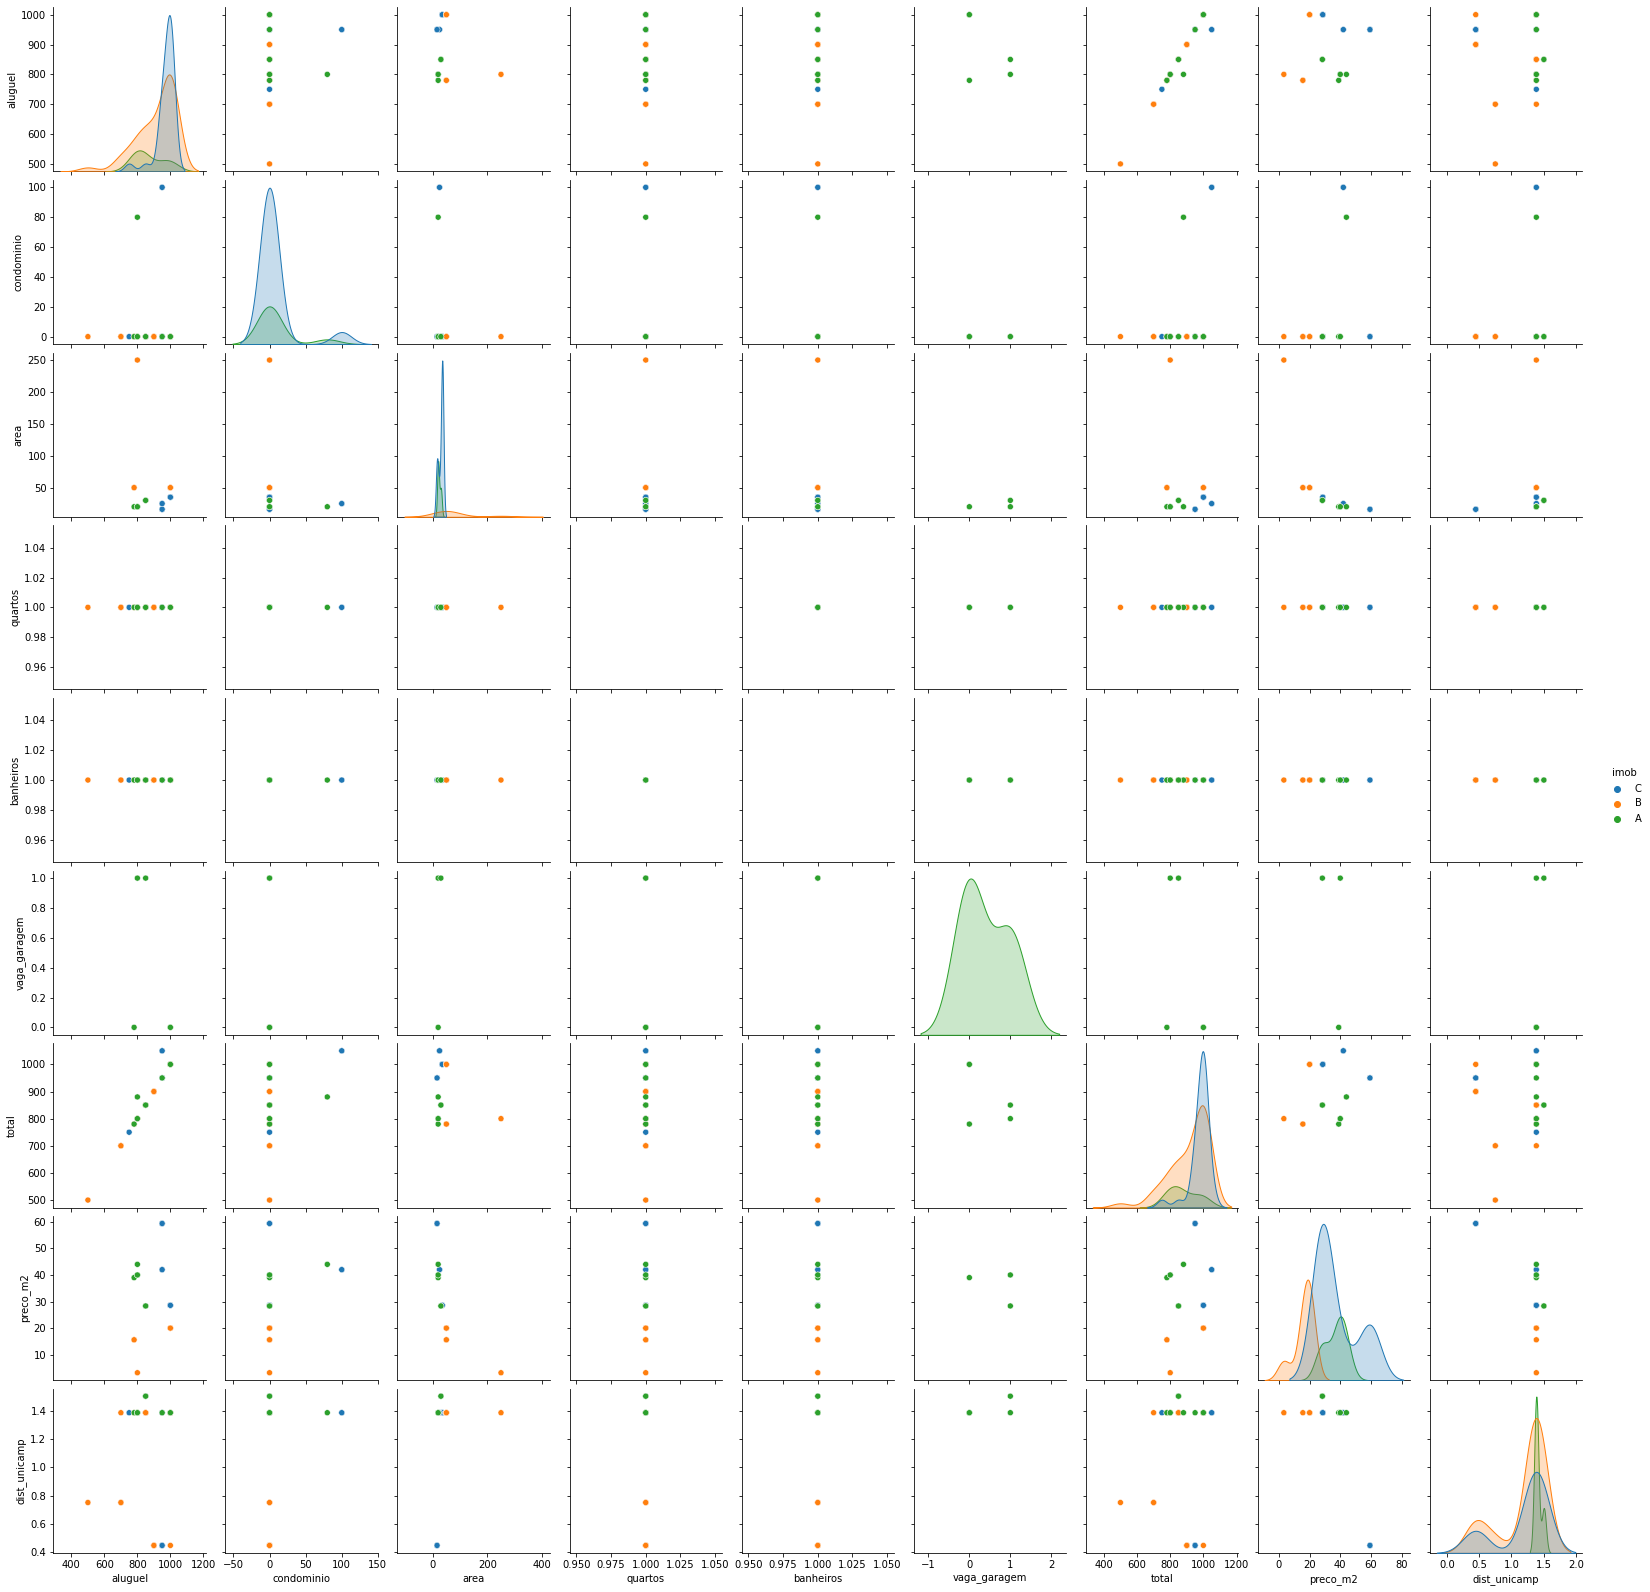

In [219]:
sns.pairplot(df_acomodacoes, hue='imob')
plt.show()

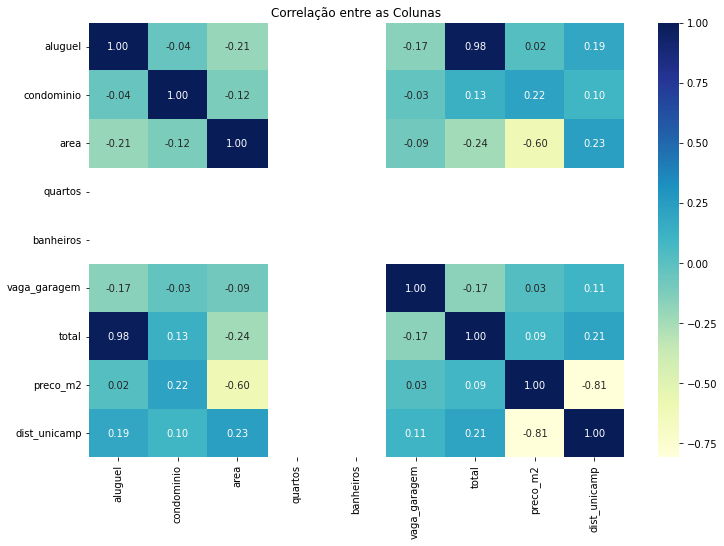

In [260]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=df_acomodacoes.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('Correlação entre as Colunas')
plt.show()

In [263]:
df_acomodacoes.groupby('imob').mean()

,aluguel,condominio,area,quartos,banheiros,vaga_garagem,total,preco_m2,dist_unicamp
imob,,,,,,,,,
A,870.000000,8.888889,23.333333,1,1,0.222222,878.888889,36.611111,1.411408
B,913.333333,0.000000,78.571429,1,1,0.000000,913.333333,16.342857,1.178872
C,971.428571,7.142857,29.523810,1,1,0.000000,978.571429,37.184524,1.184465


In [275]:
df_acomodacoes.groupby(['imob', 'bairro']).mean()

aluguel  ...  dist_unicamp
imob bairro                                  ...              
A    Chácara Antonieta           850.000000  ...      1.502339
     JD. Cidade Universitária I  875.714286  ...      1.385428
B    JD. Cidade Universitária I  944.516129  ...      1.385428
     JD. Morro Azul              633.333333  ...      0.750764
     JD. Paulista                914.285714  ...      0.447600
     JD. São Paulo               780.000000  ...           NaN
C    JD. Cidade Universitária I  977.272727  ...      1.385428
     JD. Paulista                950.000000  ...      0.447600

[8 rows x 9 columns]

In [274]:
df_acomodacoes.groupby(['imob', 'bairro']).agg(['count', 'mean'])

aluguel              ... dist_unicamp          
                                  count        mean  ...        count      mean
imob bairro                                          ...                       
A    Chácara Antonieta                2  850.000000  ...            2  1.502339
     JD. Cidade Universitária I       7  875.714286  ...            7  1.385428
B    JD. Cidade Universitária I      31  944.516129  ...           31  1.385428
     JD. Morro Azul                   3  633.333333  ...            3  0.750764
     JD. Paulista                     7  914.285714  ...            7  0.447600
     JD. São Paulo                    1  780.000000  ...            0       NaN
C    JD. Cidade Universitária I      22  977.272727  ...           22  1.385428
     JD. Paulista                     6  950.000000  ...            6  0.447600

[8 rows x 18 columns]

In [482]:
df_acomodacoes.groupby('bairro').count()

,imob,codigo,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
bairro,,,,,,,,,,,,
Chácara Antonieta,2,2,2,2,2,2,2,2,2,2,2,2
JD. Cidade Universitária I,60,60,60,60,26,60,60,60,60,60,26,60
JD. Morro Azul,3,3,3,3,0,3,3,3,3,3,0,3
JD. Paulista,13,13,13,13,5,13,13,13,13,13,5,13
JD. São Paulo,1,1,1,1,1,1,1,1,1,1,1,0


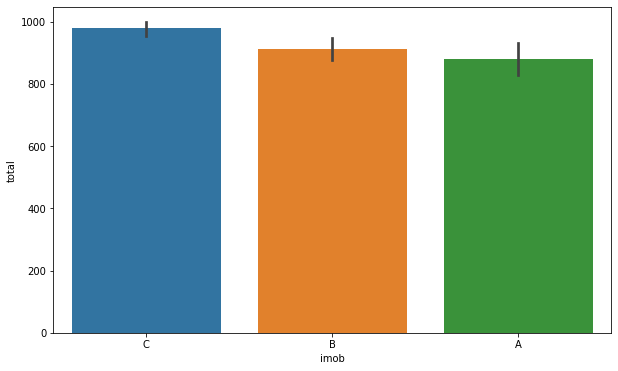

In [171]:
plt.figure(figsize=(10, 6))
sns.barplot(y='total', x='imob', data=df_acomodacoes)
plt.show()

## Classificando acomodações em categorias

### Acomodações com vaga garagem

In [340]:
def search_key_words(df_filtro, key_words):
  search_index = []

  for index in range(0, len(df_filtro)):
    for element in df_filtro.iloc[index].values:
      if type(element) == str:
        if any(x in element.lower() for x in key_words):
          search_index.append(index)

  search_index = set(search_index)
  search_index = sorted(search_index)

  new_df = df_filtro.iloc[search_index, :]
  return new_df

In [376]:
df_acomodacoes[df_acomodacoes['vaga_garagem'] > 0].shape[0]

2

In [374]:
df_filtro = search_key_words(df_acomodacoes, ['garagem', 'vaga', 'carro', 'portão'])
print(df_filtro.shape)

(11, 13)


In [375]:
df_filtro

,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
25,C,48cf0deecd859f082300f8bb8f2ee7c6,JD. Cidade Universitária I,950.0,100.0,25.0,1,1,0.0,Apartamento localizado no Chacara Antonieta co...,1050.0,42.000000,1.385428
26,C,ded7b202961dd5bb3fd74353a755c6de,JD. Cidade Universitária I,950.0,100.0,25.0,1,1,0.0,Apartamento localizado no Chacara Antonieta co...,1050.0,42.000000,1.385428
63,B,c18e0e8dc2d9c9e19e50d86b8903cfa7,JD. Cidade Universitária I,800.0,0.0,NaN,1,1,0.0,Ótimo apartamento na Cidade Universitária com ...,800.0,NaN,1.385428
72,A,9b5801ddc55b2411554d6fb109229460,JD. Cidade Universitária I,800.0,0.0,20.0,1,1,0.0,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ...",800.0,40.000000,1.385428
73,A,f773fe72ae9c3ae06183ea91d181347a,JD. Cidade Universitária I,800.0,80.0,20.0,1,1,0.0,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ...",880.0,44.000000,1.385428
74,A,350e21033122ce335fd0fd5f0031179d,JD. Cidade Universitária I,800.0,0.0,20.0,1,1,1.0,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ...",800.0,40.000000,1.385428
75,A,13a10985cb92f1112ce6894b29a575e7,Chácara Antonieta,850.0,0.0,30.0,1,1,0.0,"CAMA, GUARDA-ROUPA, GELADEIRA, BANCADA, TANQU...",850.0,28.333333,1.502339
76,A,a92a6e35acca298c33b9d2c83bde3505,Chácara Antonieta,850.0,0.0,30.0,1,1,1.0,"CAMA, GUARDA-ROUPA, GELADEIRA, BANCADA, TANQU...",850.0,28.333333,1.502339
77,A,4b4adce0a87af0846fda6bdbe38d670a,JD. Cidade Universitária I,950.0,0.0,NaN,1,1,0.0,"KITNET CONTENDO FOGÃO, GELADEIRA, ARMÁRIO EMBU...",950.0,NaN,1.385428
78,A,57c6964ba64836c81a7a7a782a4d0eb1,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,1 QUARTO COM ARMÁRIO E AR CONDICIONADO;1 SALA ...,1000.0,NaN,1.385428


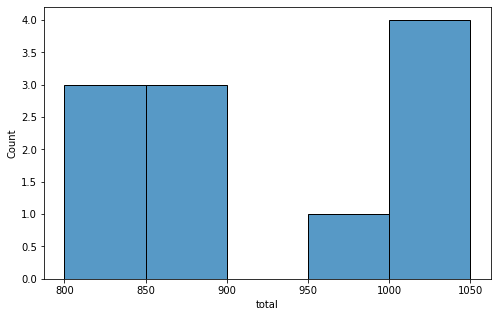

In [369]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_filtro, x="total")
plt.show()

In [343]:
df_filtro.loc[25, 'descricao']

'Apartamento localizado no Chacara Antonieta contendo quarto e sala conjugados com armário e painel de TV, cozinha planejada com geladeira e fogão, banheiro social, lavanderia e vaga na garagem para 01 carro com portão eletrônico. Acabamento em piso cerâmico e laje.\n25      M2\n1       QUARTO COM ARMÁRIO\n1       SALA COM PAINEL\n1       COZINHA PLANEJADA COM FOGÃO E GELADEIRA\n1       BANHEIRO\n1       LAVANDERIA\n1       VAGA PARA CARRO COM PORTÃO ELETRÔNICO\nPISO CERÂMICO\nTETO LAJE'

In [344]:
df_filtro.loc[63, 'descricao']

'Ótimo apartamento na Cidade Universitária com um dormitório com armários banheiro social com gabinete e box de blindex cozinha com armários geladeira microondas cooktop e área de serviço comum. Uma vaga de garagem.  O locatário ficará isento do consumo de água até 10 m³ mensal e faxina semanal na área comum.'

In [345]:
df_filtro.loc[72, 'descricao']

'COZINHA COM GELADEIRA COM DISPENSER NA PORTA, MICROONDAS, FOGÃO COOKTOP, SALA COM MESA PARA ESTUDO, AR CONDICIONADO, QUARTO COM CAMA BOX, GUARDA ROUPA EMBUTIDO.GARAGEM ROTATIVA.VALOR JÁ INCLUSO O CONDOMÍNIO: ÁGUA E LIMPEZA EXTERNA.*ENERGIA A PARTE.*OJETOS DECORATIVOS NÃO FAZEM PARTE DA LOCAÇÃO.'

In [346]:
index_acomodacoes_garagem = list(df_filtro.index)
index_acomodacoes_garagem

[25, 26, 63, 72, 73, 74, 75, 76, 77, 78, 79]

In [349]:
def acomodacao_com_garagem(index):
  return index in index_acomodacoes_garagem

### Acomodações com energia, água ou internet

In [406]:
df_filtro_contas = search_key_words(df_acomodacoes, ['energia', 'luz', 'água', 'agua', 'internet'])
print(df_filtro_contas.shape)

(38, 13)


In [408]:
df_filtro_contas.sample(5)

,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
75,A,13a10985cb92f1112ce6894b29a575e7,Chácara Antonieta,850.0,0.0,30.0,1,1,0.0,"CAMA, GUARDA-ROUPA, GELADEIRA, BANCADA, TANQU...",850.0,28.333333,1.502339
67,B,af6492af6c80fea75bafc9c5d3464970,JD. Cidade Universitária I,700.0,0.0,NaN,1,1,0.0,Apto com micro-ondas geladeira e fogão elétric...,700.0,NaN,1.385428
31,B,2c8c9e9121145fbc37ef67c0a5ea3869,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,Imóvel muito bem localizado. Conta com sala e...,1000.0,NaN,1.385428
46,B,0bec22f95dda4bc6548e30e004f81d89,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,Imóvel muito bem localizado! Conta com sala e...,1000.0,NaN,1.385428
45,B,c42857333ce48605664427a5dbb10ad3,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,Imóvel muito bem localizado. Conta com sala e ...,1000.0,NaN,1.385428


In [411]:
print(acomodacao_com_garagem(75))
df_filtro_contas.loc[75, 'descricao']

True


'CAMA,  GUARDA-ROUPA, GELADEIRA, BANCADA, TANQUE, VENTILADOR DE TETO.INCLUSO NO CONDOMINIO: AGUA, ENERGIA, LIMPEZA EXTERNA, INTERNET.1 VAGA DE GARAGEM.'

In [412]:
print(acomodacao_com_garagem(67))
df_filtro_contas.loc[67, 'descricao']

False


'Apto com micro-ondas geladeira e fogão elétrico, banheiro com box, cozinha com gabinete, sala e quarto conjugados, cerca elétrica, interfone, ponto para internet.'

Acomodações com vaga de garagem e algum tipo de serviço incluído

In [415]:
for i in list(df_filtro_contas.index):
  if acomodacao_com_garagem(i):
    print(f'index: {i}')
    print(df_filtro_contas.loc[i, ['imob', 'bairro', 'total']])

index: 63
imob                               B
bairro    JD. Cidade Universitária I
total                            800
Name: 63, dtype: object
index: 72
imob                               A
bairro    JD. Cidade Universitária I
total                            800
Name: 72, dtype: object
index: 73
imob                               A
bairro    JD. Cidade Universitária I
total                            880
Name: 73, dtype: object
index: 74
imob                               A
bairro    JD. Cidade Universitária I
total                            800
Name: 74, dtype: object
index: 75
imob                      A
bairro    Chácara Antonieta
total                   850
Name: 75, dtype: object
index: 76
imob                      A
bairro    Chácara Antonieta
total                   850
Name: 76, dtype: object
index: 77
imob                               A
bairro    JD. Cidade Universitária I
total                            950
Name: 77, dtype: object
index: 78
imob                         

In [417]:
index_acomodacoes_servicos = list(df_filtro_contas.index)
index_acomodacoes_servicos

[5,
 30,
 31,
 33,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 61,
 62,
 63,
 66,
 67,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79]

In [418]:
def acomodacao_com_servico(index):
  return index in index_acomodacoes_servicos

### Filtrando bairros mais **pertos**

In [458]:
filtro_bairros_pertos = (
    (df_acomodacoes['bairro'] == 'JD. Paulista') |
    (df_acomodacoes['bairro'] == 'JD. Morro Azul')
)

df_bairros_pertos = df_acomodacoes[filtro_bairros_pertos].copy()
total_pertos = df_bairros_pertos.shape[0]
print(total_pertos)
df_bairros_pertos.sample(8)

16


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
68,B,07f6384f6c2c7d702650281e7a51f958,JD. Morro Azul,700.0,0.0,NaN,1,1,0.0,"Kitnet com área de serviço, 1 dormitório, 1 co...",700.0,NaN,0.750764
54,B,2ca1576c1451e643b68e997da302e8ef,JD. Paulista,900.0,0.0,NaN,1,1,0.0,Imóvel totalmente reformado para atender espec...,900.0,NaN,0.447600
28,B,8ea6bceec892ab9d2467eb912385a1a9,JD. Paulista,1000.0,0.0,NaN,1,1,0.0,"Kitnet com um dormitório, banheiro, cozinha, á...",1000.0,NaN,0.447600
22,C,7b17e06caa3474661e0d2ac8f44da80f,JD. Paulista,950.0,0.0,NaN,1,1,0.0,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,NaN,0.447600
51,B,568d1b833c4816a90df87ba89831f0ef,JD. Paulista,900.0,0.0,NaN,1,1,0.0,Imóvel totalmente reformado para atender espec...,900.0,NaN,0.447600
69,B,39a6db2728600ac4a1ef144ab6635476,JD. Morro Azul,500.0,0.0,NaN,1,1,0.0,"Kitnet com 1 dormitório, 1 cozinha e 1 banheir...",500.0,NaN,0.750764
27,C,b2d83e2253d0695b33e339b8fdd48a94,JD. Paulista,950.0,0.0,16.0,1,1,0.0,Kitinet medindo 16 m² próximo à Faculdade Unic...,950.0,59.375,0.447600
24,C,74f4cf90ff8521e47f0acd347411dc9a,JD. Paulista,950.0,0.0,16.0,1,1,0.0,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,59.375,0.447600


In [289]:
df_bairros_pertos.groupby(['imob', 'bairro']).agg(['count', 'mean', 'std'])

aluguel                          ... dist_unicamp               
                      count        mean         std  ...        count      mean  std
imob bairro                                          ...                            
B    JD. Morro Azul       3  633.333333  115.470054  ...            3  0.750764  0.0
     JD. Paulista         7  914.285714   37.796447  ...            7  0.447600  0.0
C    JD. Paulista         6  950.000000    0.000000  ...            6  0.447600  0.0

[3 rows x 27 columns]

#### Acomodações mais perto e **baratas**

In [459]:
filtro_imobB_bairro_morro = (
    (df_bairros_pertos['imob'] == 'B') &
    (df_bairros_pertos['bairro'] == 'JD. Morro Azul')
)

df_bairros_pertos_baratos = df_bairros_pertos[filtro_imobB_bairro_morro]
total_perto_barato = df_bairros_pertos_baratos.shape[0]
print(total_perto_barato)
df_bairros_pertos_baratos

3


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
66,B,6cb940ae9001fba36d6b120bca0fa2c1,JD. Morro Azul,700.0,0.0,NaN,1,1,0.0,"Quitinete com dormitório e cozinha conjugados,...",700.0,NaN,0.750764
68,B,07f6384f6c2c7d702650281e7a51f958,JD. Morro Azul,700.0,0.0,NaN,1,1,0.0,"Kitnet com área de serviço, 1 dormitório, 1 co...",700.0,NaN,0.750764
69,B,39a6db2728600ac4a1ef144ab6635476,JD. Morro Azul,500.0,0.0,NaN,1,1,0.0,"Kitnet com 1 dormitório, 1 cozinha e 1 banheir...",500.0,NaN,0.750764


In [455]:
print(acomodacao_com_garagem(66))
print(acomodacao_com_servico(66))
df_bairros_pertos_baratos.loc[66, 'descricao']

False
True


'Quitinete com dormitório e cozinha conjugados, banheiro com box de blindex e área de serviço de uso comum. Está incluso no valor do aluguel o consumo de agua e energia.   ***O valor de R$ 700,00 será se a locação for para uma pessoa. Caso seja para duas pessoas, o valor será de R$ 800,00.***'

In [456]:
print(acomodacao_com_garagem(68))
print(acomodacao_com_servico(68))
df_bairros_pertos_baratos.loc[68, 'descricao']

False
False


'Kitnet com área de serviço, 1 dormitório, 1 cozinha e 1 banheiro.'

In [457]:
print(acomodacao_com_garagem(69))
print(acomodacao_com_servico(69))
df_bairros_pertos_baratos.loc[69, 'descricao']

False
False


'Kitnet com 1 dormitório, 1 cozinha e 1 banheiro, nos fundos do imóvel.'

#### Acomodações mais perto e **caras**

In [460]:
filtro_caro = (
    (df_bairros_pertos['total'] > 700)
)

df_pertos_caros = df_bairros_pertos[filtro_caro]
total_perto_caro = df_pertos_caros.shape[0]
print(total_perto_caro)
df_pertos_caros

13


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
20,C,b3b477f0632310b03bde750706df4596,JD. Paulista,950.0,0.0,16.0,1,1,0.0,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,59.375,0.4476
21,C,d7605883477939a58e52e551391d5dcb,JD. Paulista,950.0,0.0,16.0,1,1,0.0,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,59.375,0.4476
22,C,7b17e06caa3474661e0d2ac8f44da80f,JD. Paulista,950.0,0.0,NaN,1,1,0.0,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,NaN,0.4476
23,C,6a079dd44e0e8cc401934fe33492d0bc,JD. Paulista,950.0,0.0,16.0,1,1,0.0,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,59.375,0.4476
24,C,74f4cf90ff8521e47f0acd347411dc9a,JD. Paulista,950.0,0.0,16.0,1,1,0.0,Kitnet localizada próximo à Unicamp (FCA) cont...,950.0,59.375,0.4476
27,C,b2d83e2253d0695b33e339b8fdd48a94,JD. Paulista,950.0,0.0,16.0,1,1,0.0,Kitinet medindo 16 m² próximo à Faculdade Unic...,950.0,59.375,0.4476
28,B,8ea6bceec892ab9d2467eb912385a1a9,JD. Paulista,1000.0,0.0,NaN,1,1,0.0,"Kitnet com um dormitório, banheiro, cozinha, á...",1000.0,NaN,0.4476
51,B,568d1b833c4816a90df87ba89831f0ef,JD. Paulista,900.0,0.0,NaN,1,1,0.0,Imóvel totalmente reformado para atender espec...,900.0,NaN,0.4476
52,B,873507a6a50bde15b658b1550f729dc1,JD. Paulista,900.0,0.0,NaN,1,1,0.0,Imóvel totalmente reformado para atender espec...,900.0,NaN,0.4476
53,B,d81e604fe471f170cc3cc19ee73c20dc,JD. Paulista,900.0,0.0,NaN,1,1,0.0,Imóvel totalmente reformado para atender espec...,900.0,NaN,0.4476


#### **VALIDAÇÃO**

In [461]:
assert total_perto_barato + total_perto_caro == total_pertos

Exportar **acomodações mais perto e barato**

In [518]:
df_bairros_pertos_baratos = df_bairros_pertos[filtro_imobB_bairro_morro].copy()
print(df_bairros_pertos_baratos.shape)
df_bairros_pertos_baratos.index.name = 'index'
df_bairros_pertos_baratos.to_csv('acomodacoes_perto_barato.csv')
files.download('acomodacoes_perto_barato.csv')

(3, 13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exportar **acomodações mais perto e caro**

In [520]:
print(df_pertos_caros.shape)
df_pertos_caros.index.name = 'index'
df_pertos_caros.to_csv('acomodacoes_perto_caro.csv')
files.download('acomodacoes_perto_caro.csv')

(13, 13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Filtrando bairros mais **longes**

In [483]:
filtro_bairros_longe = (
    (df_acomodacoes['bairro'] == 'JD. Cidade Universitária I') |
    (df_acomodacoes['bairro'] == 'Chácara Antonieta') |
    (df_acomodacoes['bairro'] == 'JD. São Paulo')
)

df_bairros_longe = df_acomodacoes[filtro_bairros_longe].copy()
total_longes = df_bairros_longe.shape[0]
print(total_longes)
df_bairros_longe.sample(5)

63


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
58,B,97bcff626e416e4682240b08bfe240e9,JD. Cidade Universitária I,850.0,0.0,NaN,1,1,0.0,"Kitnet no bairro Universitário, próximo a Unic...",850.0,NaN,1.385428
75,A,13a10985cb92f1112ce6894b29a575e7,Chácara Antonieta,850.0,0.0,30.0,1,1,0.0,"CAMA, GUARDA-ROUPA, GELADEIRA, BANCADA, TANQU...",850.0,28.333333,1.502339
32,B,358c95a5fb745563272054e6f2a14985,JD. Cidade Universitária I,1000.0,0.0,50.0,1,1,0.0,"Imóvel com cozinha com gabinete, armários, mes...",1000.0,20.000000,1.385428
14,C,3a6973c5d2b2a8726c531a1693ea2ac1,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,NaN,1.385428
65,B,907f7fdcc12a82eadaec78ffa35e4708,JD. São Paulo,780.0,0.0,50.0,1,1,0.0,"Kitnet com 01 dormitório, 01 banheiro.",780.0,15.600000,NaN


In [484]:
df_bairros_longe.groupby(['imob', 'bairro']).agg(['count', 'mean', 'std'])

aluguel              ... dist_unicamp     
                                  count        mean  ...         mean  std
imob bairro                                          ...                  
A    Chácara Antonieta                2  850.000000  ...     1.502339  0.0
     JD. Cidade Universitária I       7  875.714286  ...     1.385428  0.0
B    JD. Cidade Universitária I      31  944.516129  ...     1.385428  0.0
     JD. São Paulo                    1  780.000000  ...          NaN  NaN
C    JD. Cidade Universitária I      22  977.272727  ...     1.385428  0.0

[5 rows x 27 columns]

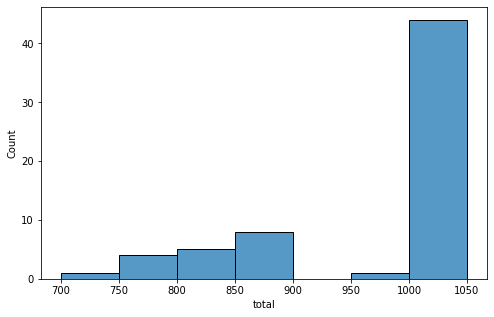

In [485]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_bairros_longe, x="total")
plt.show()

#### Acomodações longes e mais **baratas**

In [486]:
filtro_mais_baratos = (
    (df_bairros_longe['total'] < 1000)
)

df_bairros_longe_barato = df_bairros_longe[filtro_mais_baratos]
total_longes_barato = df_bairros_longe_barato.shape[0]
print(total_longes_barato)
df_bairros_longe_barato.head()

19


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
5,C,660f29bab4766650b9e3e62aae4f6730,JD. Cidade Universitária I,850.0,0.0,NaN,1,1,0.0,Kitinet próximo à Unicamp (FCA) sendo 01 quart...,850.0,NaN,1.385428
11,C,17e432c6fd9c0be3a2cbf043f3bd8387,JD. Cidade Universitária I,750.0,0.0,NaN,1,1,0.0,Kitinet localizada na Cidade Universitária pró...,750.0,NaN,1.385428
57,B,d1f942def322fc204b6be20838e7d044,JD. Cidade Universitária I,850.0,0.0,NaN,1,1,0.0,Kitnet localizada na Cidade Universitária próx...,850.0,NaN,1.385428
58,B,97bcff626e416e4682240b08bfe240e9,JD. Cidade Universitária I,850.0,0.0,NaN,1,1,0.0,"Kitnet no bairro Universitário, próximo a Unic...",850.0,NaN,1.385428
59,B,3efb8f5900d5b5dff557d6857681338a,JD. Cidade Universitária I,850.0,0.0,NaN,1,1,0.0,Kitnet localizada na Cidade Universitária próx...,850.0,NaN,1.385428


In [487]:
print(search_key_words(df_bairros_longe_barato, ['garagem', 'vaga', 'carro', 'portão']).shape[0])

7


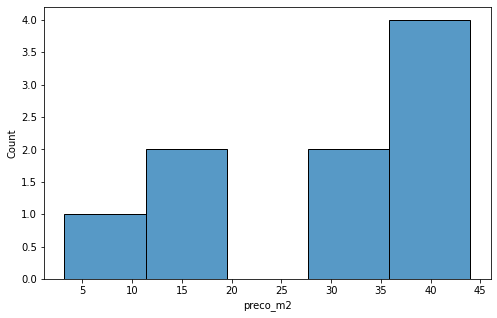

In [488]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_bairros_longe_barato, x="preco_m2")
plt.show()

##### Acomodações mais longes, baratas e **maior** custo-benefício (preço/m2)

In [489]:
filtro_barato_menor_m2 = (
    ((df_bairros_longe_barato['preco_m2'] < 35) | (df_bairros_longe_barato['preco_m2'].isnull()))
)

df_longe_barato_menor_m2 = df_bairros_longe_barato[filtro_barato_menor_m2].sort_values(by='total')
total_longes_barato_menor_m2 = df_longe_barato_menor_m2.shape[0]
print(total_longes_barato_menor_m2)
df_longe_barato_menor_m2

15


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
67,B,af6492af6c80fea75bafc9c5d3464970,JD. Cidade Universitária I,700.0,0.0,NaN,1,1,0.0,Apto com micro-ondas geladeira e fogão elétric...,700.0,NaN,1.385428
11,C,17e432c6fd9c0be3a2cbf043f3bd8387,JD. Cidade Universitária I,750.0,0.0,NaN,1,1,0.0,Kitinet localizada na Cidade Universitária pró...,750.0,NaN,1.385428
64,B,4ea828c758c2c3ad996f717c4ea91ed5,JD. Cidade Universitária I,780.0,0.0,50.0,1,1,0.0,"Kitnet com cozinha e sala conjugadas, um dormi...",780.0,15.600000,1.385428
65,B,907f7fdcc12a82eadaec78ffa35e4708,JD. São Paulo,780.0,0.0,50.0,1,1,0.0,"Kitnet com 01 dormitório, 01 banheiro.",780.0,15.600000,NaN
61,B,ccbc8c34f1aafff2ded08a18d8826c6f,JD. Cidade Universitária I,800.0,0.0,250.0,1,1,0.0,Ótimo apartamento na Cidade Universitária com ...,800.0,3.200000,1.385428
62,B,decee23146cd497fccdaa119dd7f51b8,JD. Cidade Universitária I,800.0,0.0,NaN,1,1,0.0,Ótimo apartamento na Cidade Universitária com ...,800.0,NaN,1.385428
63,B,c18e0e8dc2d9c9e19e50d86b8903cfa7,JD. Cidade Universitária I,800.0,0.0,NaN,1,1,0.0,Ótimo apartamento na Cidade Universitária com ...,800.0,NaN,1.385428
5,C,660f29bab4766650b9e3e62aae4f6730,JD. Cidade Universitária I,850.0,0.0,NaN,1,1,0.0,Kitinet próximo à Unicamp (FCA) sendo 01 quart...,850.0,NaN,1.385428
57,B,d1f942def322fc204b6be20838e7d044,JD. Cidade Universitária I,850.0,0.0,NaN,1,1,0.0,Kitnet localizada na Cidade Universitária próx...,850.0,NaN,1.385428
58,B,97bcff626e416e4682240b08bfe240e9,JD. Cidade Universitária I,850.0,0.0,NaN,1,1,0.0,"Kitnet no bairro Universitário, próximo a Unic...",850.0,NaN,1.385428


In [490]:
print(acomodacao_com_garagem(67))
print(acomodacao_com_servico(67))
df_longe_barato_menor_m2.loc[67, 'descricao']

False
True


'Apto com micro-ondas geladeira e fogão elétrico, banheiro com box, cozinha com gabinete, sala e quarto conjugados, cerca elétrica, interfone, ponto para internet.'

In [491]:
print(acomodacao_com_garagem(11))
print(acomodacao_com_servico(11))
df_longe_barato_menor_m2.loc[11, 'descricao']

False
False


'Kitinet localizada na Cidade Universitária próximo a Unicamp (FCA) contendo 01 quarto e cozinha conjugados, banheiro e lavanderia, imóvel também possui cama e micro-ondas.\n1       QUARTO CONJUGADO COM COZINHA\n1       BANHEIRO\n1       LAVANDERIA\nPISO PORCELANATO\nTETO LAJE E GESSO'

In [492]:
print(acomodacao_com_garagem(64))
print(acomodacao_com_servico(64))
df_longe_barato_menor_m2.loc[64, 'descricao']

False
False


'Kitnet com cozinha e sala conjugadas, um dormitório e banheiro.'

In [493]:
print(acomodacao_com_garagem(61))
print(acomodacao_com_servico(61))
df_longe_barato_menor_m2.loc[61, 'descricao']

False
True


'Ótimo apartamento na Cidade Universitária com um dormitório com armários, banheiro social com gabinete e box de blindex, sala, cozinha com armários, geladeira, microondas, cooktop e área de serviço comum.  O locatário ficará isento do consumo de água até 10 m³ mensal e faxina semanal na área comum.'

In [494]:
print(acomodacao_com_garagem(62))
print(acomodacao_com_servico(62))
df_longe_barato_menor_m2.loc[62, 'descricao']

False
True


'Ótimo apartamento na Cidade Universitária com um dormitório com armários, banheiro social com gabinete e box, sala, cozinha com armários, geladeira, microondas, cooktop e área de serviço comum.  O locatário ficará isento do consumo de água (até 10 m³ mensal) e faxina semanal na área comum.'

In [495]:
### Vaga de garagem ###
print(acomodacao_com_garagem(63))
print(acomodacao_com_servico(63))
df_longe_barato_menor_m2.loc[63, 'descricao']

True
True


'Ótimo apartamento na Cidade Universitária com um dormitório com armários banheiro social com gabinete e box de blindex cozinha com armários geladeira microondas cooktop e área de serviço comum. Uma vaga de garagem.  O locatário ficará isento do consumo de água até 10 m³ mensal e faxina semanal na área comum.'

##### Acomodações mais longes, baratas e **menor** custo-benefício (preço/m2)

In [496]:
filtro_barato_maior_m2 = (
    (df_bairros_longe_barato['preco_m2'] >= 35)
)

df_longe_barato_maior_m2 = df_bairros_longe_barato[filtro_barato_maior_m2].sort_values(by='total')
total_longes_barato_maior_m2 = df_longe_barato_maior_m2.shape[0]
print(total_longes_barato_maior_m2)
df_longe_barato_maior_m2

4


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
71,A,c5a84c8eb6b4f9c7389fd32afa1e5357,JD. Cidade Universitária I,780.0,0.0,20.0,1,1,0.0,"KITNET COM CAMA, ARMÁRIOS, ESCRIVANINHA,COZINH...",780.0,39.0,1.385428
72,A,9b5801ddc55b2411554d6fb109229460,JD. Cidade Universitária I,800.0,0.0,20.0,1,1,0.0,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ...",800.0,40.0,1.385428
74,A,350e21033122ce335fd0fd5f0031179d,JD. Cidade Universitária I,800.0,0.0,20.0,1,1,1.0,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ...",800.0,40.0,1.385428
73,A,f773fe72ae9c3ae06183ea91d181347a,JD. Cidade Universitária I,800.0,80.0,20.0,1,1,0.0,"COZINHA COM GELADEIRA COM DISPENSER NA PORTA, ...",880.0,44.0,1.385428


##### **VALIDAÇÃO**

In [497]:
assert total_longes_barato_menor_m2 + total_longes_barato_maior_m2 == total_longes_barato

Exportar **acomodações mais longe, barato e custo-benefício**

In [521]:
print(df_longe_barato_menor_m2.shape)
df_longe_barato_menor_m2.index.name = 'index'
df_longe_barato_menor_m2.to_csv('acomodacoes_longe_barato_menor_m2.csv')
files.download('acomodacoes_longe_barato_menor_m2.csv')

(15, 13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exportar **acomodações mais longe, barato e menor custo-benefício**

In [522]:
print(df_longe_barato_maior_m2.shape)
df_longe_barato_maior_m2.index.name = 'index'
df_longe_barato_maior_m2.to_csv('acomodacoes_longe_barato_maior_m2.csv')
files.download('acomodacoes_longe_barato_maior_m2.csv')

(4, 13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Acomodações longes e mais **caras**

In [500]:
filtro_mais_caros = (
    (df_bairros_longe['total'] >= 1000)
)

df_bairros_longe_caro = df_bairros_longe[filtro_mais_caros]
total_longes_caro = df_bairros_longe_caro.shape[0]
print(total_longes_caro)
df_bairros_longe_caro.head()

44


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
0,C,57544d6162644c4cec89720f0d0fb27b,JD. Cidade Universitária I,1000.0,0.0,35.0,1,1,0.0,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429,1.385428
1,C,00f33a85f39b78148f5941eac174acd2,JD. Cidade Universitária I,1000.0,0.0,35.0,1,1,0.0,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429,1.385428
2,C,b62fad32adf34709c628e9833d66b8df,JD. Cidade Universitária I,1000.0,0.0,35.0,1,1,0.0,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429,1.385428
3,C,2d7097bf091516c6952950802bd49019,JD. Cidade Universitária I,1000.0,0.0,35.0,1,1,0.0,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429,1.385428
4,C,12d0456fa8a537ce311abb5ea43c4b03,JD. Cidade Universitária I,1000.0,0.0,35.0,1,1,0.0,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429,1.385428


In [501]:
print(search_key_words(df_bairros_longe_caro, ['garagem', 'vaga', 'carro', 'portão']).shape[0])

4


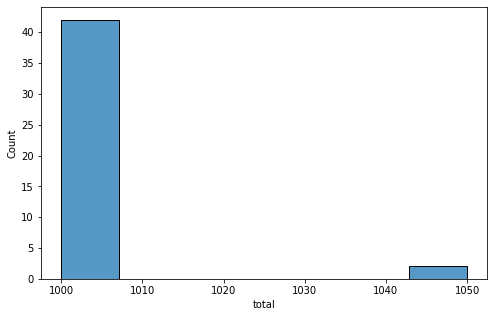

In [502]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_bairros_longe_caro, x="total")
plt.show()

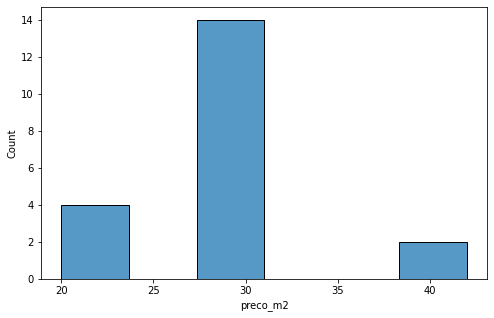

In [503]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_bairros_longe_caro, x="preco_m2")
plt.show()

##### Acomodações mais longes, caras e **maior** custo-benefício (preço/m2)

In [504]:
filtro_caro_menor_m2 = (
    ((df_bairros_longe_caro['preco_m2'] < 35) | (df_bairros_longe_caro['preco_m2'].isnull()))
)

df_longe_caro_menor_m2 = df_bairros_longe_caro[filtro_caro_menor_m2].sort_values(by='total')
total_longes_caro_maior_m2 = df_longe_caro_menor_m2.shape[0]
print(total_longes_caro_maior_m2)
df_longe_caro_menor_m2.head()

42


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
0,C,57544d6162644c4cec89720f0d0fb27b,JD. Cidade Universitária I,1000.0,0.0,35.0,1,1,0.0,Kitnet próxima à Unicamp (FCA) contendo quarto...,1000.0,28.571429,1.385428
34,B,7ef0dfe78be61f5fd8392d3948fb860c,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,"Imóvel com: geladeira, fogão, gabinete e mesa ...",1000.0,NaN,1.385428
35,B,5416c9b0aba5eb43b419b107d3975a76,JD. Cidade Universitária I,1000.0,0.0,50.0,1,1,0.0,Imóvel muito bem localizado Conta com sala e ...,1000.0,20.000000,1.385428
36,B,e3ac2c5e0d51230d756de5db78c7452d,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,Imóvel em frente à portaria principal da Unica...,1000.0,NaN,1.385428
37,B,8fb0a0798b0f5b56b77aaf7df6294525,JD. Cidade Universitária I,1000.0,0.0,NaN,1,1,0.0,Imóvel próximo à Unicamp e também com entrada ...,1000.0,NaN,1.385428


##### Acomodações mais longes, caras e **menor** custo-benefício (preço/m2)

In [505]:
filtro_caro_maior_m2 = (
    (df_bairros_longe_caro['total'] > 1040) & 
    ((df_bairros_longe_caro['preco_m2'] > 35) | (df_bairros_longe_caro['preco_m2'].isnull()))
)

df_longe_caro_maior_m2 = df_bairros_longe_caro[filtro_caro_maior_m2].sort_values(by='total')
total_longes_caro_menor_m2 = df_longe_caro_maior_m2.shape[0]
print(total_longes_caro_menor_m2)
df_longe_caro_maior_m2.head()

2


,imob,codigo,bairro,aluguel,condominio,area,quartos,banheiros,vaga_garagem,descricao,total,preco_m2,dist_unicamp
25,C,48cf0deecd859f082300f8bb8f2ee7c6,JD. Cidade Universitária I,950.0,100.0,25.0,1,1,0.0,Apartamento localizado no Chacara Antonieta co...,1050.0,42.0,1.385428
26,C,ded7b202961dd5bb3fd74353a755c6de,JD. Cidade Universitária I,950.0,100.0,25.0,1,1,0.0,Apartamento localizado no Chacara Antonieta co...,1050.0,42.0,1.385428


In [506]:
print(search_key_words(df_longe_caro_maior_m2, ['garagem', 'vaga', 'carro', 'portão']).shape[0])

2


In [507]:
### Vaga de garagem ###
print(acomodacao_com_garagem(25))
print(acomodacao_com_servico(25))
df_longe_caro_maior_m2.loc[25, 'descricao']

True
False


'Apartamento localizado no Chacara Antonieta contendo quarto e sala conjugados com armário e painel de TV, cozinha planejada com geladeira e fogão, banheiro social, lavanderia e vaga na garagem para 01 carro com portão eletrônico. Acabamento em piso cerâmico e laje.\n25      M2\n1       QUARTO COM ARMÁRIO\n1       SALA COM PAINEL\n1       COZINHA PLANEJADA COM FOGÃO E GELADEIRA\n1       BANHEIRO\n1       LAVANDERIA\n1       VAGA PARA CARRO COM PORTÃO ELETRÔNICO\nPISO CERÂMICO\nTETO LAJE'

In [508]:
### Vaga de garagem ###
print(acomodacao_com_garagem(26))
print(acomodacao_com_servico(26))
df_longe_caro_maior_m2.loc[26, 'descricao']

True
False


'Apartamento localizado no Chacara Antonieta contendo quarto e sala conjugados com armário e painel de TV, cozinha planejada com geladeira e fogão, banheiro social, lavanderia e vaga na garagem para 01 carro com portão eletrônico. Acabamento em piso cerâmico e laje.\n25      M2\n1       QUARTO COM ARMÁRIO\n1       SALA COM PAINEL DE TV\n1       COZINHA PLANEJADA COM FOGÃO E GELADEIRA\n1       LAVANDERIA\n1       VAGA PARA CARRO COM PORTÃO ELETRÔNICO\nPISO CERÂMICO\nTETO LAJE'

#### **VALIDAÇÃO**

In [509]:
assert total_longes_caro_menor_m2 + total_longes_caro_maior_m2 == total_longes_caro

In [510]:
assert total_longes_barato + total_longes_caro == total_longes

In [511]:
assert total_pertos + total_longes == df_acomodacoes.shape[0]

Exportar **acomodações mais longe, caros e custo-benefício**

In [523]:
print(df_longe_caro_menor_m2.shape)
df_longe_caro_menor_m2.index.name = 'index'
df_longe_caro_menor_m2.to_csv('acomodacoes_longe_caro_menor_m2.csv')
files.download('acomodacoes_longe_caro_menor_m2.csv')

(42, 13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exportar **acomodações mais longe, caros e menor custo-benefício**

In [524]:
print(df_longe_caro_maior_m2.shape)
df_longe_caro_maior_m2.index.name = 'index'
df_longe_caro_maior_m2.to_csv('acomodacoes_longe_caro_maior_m2.csv')
files.download('acomodacoes_longe_caro_maior_m2.csv')

(2, 13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Validando exportações

In [525]:
df1 = pd.read_csv('/content/acomodacoes_longe_barato_maior_m2.csv', index_col='index')
df2 = pd.read_csv('/content/acomodacoes_longe_barato_menor_m2.csv', index_col='index')
df3 = pd.read_csv('/content/acomodacoes_longe_caro_maior_m2.csv', index_col='index')
df4 = pd.read_csv('/content/acomodacoes_longe_caro_menor_m2.csv', index_col='index')
df5 = pd.read_csv('/content/acomodacoes_perto_barato.csv', index_col='index')
df6 = pd.read_csv('/content/acomodacoes_perto_caro.csv', index_col='index')

In [527]:
total_df1 = df1.shape[0]
total_df2 = df2.shape[0]
total_df3 = df3.shape[0]
total_df4 = df4.shape[0]
total_df5 = df5.shape[0]
total_df6 = df6.shape[0]

In [528]:
assert (total_df1 + total_df2 + total_df3 + total_df4 + total_df5 + total_df6) == df_acomodacoes.shape[0] 

## Analisando categorias de acomodações

In [553]:
def get_indexes_acomodacao_garagem(df):
  return [i for i in list(df.index) if acomodacao_com_garagem(i)]

def get_indexes_acomodacao_servicos(df):
  return [i for i in list(df.index) if acomodacao_com_servico(i)]

### Acomodações **longe, barato e maior custo-benefício**

**DataFrame 1** possui **3 acomodações** com vaga de garagem E<br>
**DataFrame 1** possui **4 acomodações** com algum tipo de "serviço" incluso (água, luz, internet)

In [555]:
print(get_indexes_acomodacao_garagem(df1))
print(get_indexes_acomodacao_servicos(df1))

[72, 74, 73]
[71, 72, 74, 73]


In [570]:
final_indexes_df1 = set(get_indexes_acomodacao_garagem(df1)).intersection(set(get_indexes_acomodacao_servicos(df1)))
final_indexes_df1

{72, 73, 74}

### Acomodações **longe, barato e menor custo-benefício**

**DataFrame 2** possui **4 acomodações** com vaga de garagem E<br>
**DataFrame 2** possui **8 acomodações** com algum tipo de "serviço" incluso (água, luz, internet)

In [556]:
print(get_indexes_acomodacao_garagem(df2))
print(get_indexes_acomodacao_servicos(df2))

[63, 75, 76, 77]
[67, 61, 62, 63, 5, 75, 76, 77]


In [572]:
final_indexes_df2 = set(get_indexes_acomodacao_garagem(df2)).intersection(set(get_indexes_acomodacao_servicos(df2)))
final_indexes_df2

{63, 75, 76, 77}

### Acomodações **longe, caro e maior custo-benefício**

**DataFrame 3** possui **2 acomodações** com vaga de garagem E<br>
**DataFrame 3** possui **0 acomodações** com algum tipo de "serviço" incluso (água, luz, internet)

In [557]:
print(get_indexes_acomodacao_garagem(df3))
print(get_indexes_acomodacao_servicos(df3))

[25, 26]
[]


In [573]:
final_indexes_df3 = set(get_indexes_acomodacao_garagem(df3)).intersection(set(get_indexes_acomodacao_servicos(df3)))
final_indexes_df3

set()

### Acomodações **longe, caro e menor custo-benefício**

**DataFrame 4** possui **2 acomodações** com vaga de garagem E<br>
**DataFrame 4** possui **20 acomodações** com algum tipo de "serviço" incluso (água, luz, internet)

In [558]:
print(get_indexes_acomodacao_garagem(df4))
print(get_indexes_acomodacao_servicos(df4))

[78, 79]
[35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 33, 31, 30, 78, 79]


In [574]:
final_indexes_df4 = set(get_indexes_acomodacao_garagem(df4)).intersection(set(get_indexes_acomodacao_servicos(df4)))
final_indexes_df4

{78, 79}

### Acomodações **perto e barato**

**DataFrame 5** possui **0 acomodações** com vaga de garagem E<br>
**DataFrame 5** possui **1 acomodação** com algum tipo de "serviço" incluso (água, luz, internet)

In [559]:
print(get_indexes_acomodacao_garagem(df5))
print(get_indexes_acomodacao_servicos(df5))

[]
[66]


In [575]:
final_indexes_df5 = set(get_indexes_acomodacao_garagem(df5)).intersection(set(get_indexes_acomodacao_servicos(df5)))
final_indexes_df5

set()

### Acomodações **perto e caro**

**DataFrame 6** possui **0 acomodações** com vaga de garagem E<br>
**DataFrame 6** possui **5 acomodações** com algum tipo de "serviço" incluso (água, luz, internet)

In [560]:
print(get_indexes_acomodacao_garagem(df6))
print(get_indexes_acomodacao_servicos(df6))

[]
[51, 52, 53, 54, 55]


In [576]:
final_indexes_df6 = set(get_indexes_acomodacao_garagem(df6)).intersection(set(get_indexes_acomodacao_servicos(df6)))
final_indexes_df6

set()

### Index das acomodações com vaga de garagem de algum tipo de "serviço" incluso

In [588]:
final_indexes = final_indexes_df1.union(final_indexes_df2).union(final_indexes_df3).union(final_indexes_df4).union(final_indexes_df5).union(final_indexes_df6)
final_indexes = np.array(list(final_indexes))
final_indexes = np.sort(final_indexes)
final_indexes

array([63, 72, 73, 74, 75, 76, 77, 78, 79])

In [591]:
np.save('final_indexes', final_indexes)
files.download('final_indexes.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [592]:
array_import = np.load('final_indexes.npy')
array_import

array([63, 72, 73, 74, 75, 76, 77, 78, 79])